# Introduction

In this notebook, we analyse the oracles generated in **feat_br_orc_v2_gen** notebook:
 
 * Feat_BR_volunteers
 * Feat_BR_expert
 * Feat_BR_volunteers_expert_union
 * Feat_BR_volunteers_expert_intersec

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np

from sklearn.metrics import cohen_kappa_score

from modules.utils import firefox_dataset_p2 as fd
from modules.utils import aux_functions

from matplotlib import pyplot as plt

In [2]:
feat_br_expert_volunteers_union_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df()
feat_br_expert_volunteers_intersec_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df()
feat_br_volunteers_oracle = fd.Feat_BR_Oracles.read_feat_br_volunteers_df()
feat_br_expert_oracle = fd.Feat_BR_Oracles.read_feat_br_expert_df()
print()

br_2_feature_matrix_final = fd.Feat_BR_Oracles.read_br_2_features_matrix_final_df()
print()

bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

Expert and Volunteers Matrix UNION.shape: (91, 19)
Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Feat_BR Volunteers Matrix shape: (91, 19)
Feat_BR Expert Matrix shape: (91, 19)

BR_2_Features Matrix Final.shape: (91, 5)

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Cohen's Kappa - Features x Bug Reports Trace Matrix

The Cohen's Kappa Score measures the iter-rater agreement for qualitive answers (categorical items). It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.

In the section bellow, we calculate the Cohen's kappa with the expert answers and the volunteers answers.

In [3]:
expert_answers = []
volunteers_answers = []

for idx,row in feat_br_volunteers_oracle.iterrows():
    for col in feat_br_volunteers_oracle.columns:
        volunteers_answers.append(feat_br_volunteers_oracle.at[idx,col])
        expert_answers.append(feat_br_expert_oracle.at[idx,col])

print("Expert Answers Length: {}".format(len(expert_answers)))
print("Volunteers Answers Length: {}".format(len(volunteers_answers)))

print("Cohen Kappa Score: {}".format(cohen_kappa_score(expert_answers, volunteers_answers)))

Expert Answers Length: 1729
Volunteers Answers Length: 1729
Cohen Kappa Score: 0.42663939174800525


We can observe that we have a weak inter-rater agreement level, because the kappa is between 0.40 and 0.59, we have only 15-35% of the data reliable. [Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900052/)

## Effects of Sparsity over Kappa Metric

We can observe that the Kappa metric is affected positively by the sparsity of the matrices that the answers submitted to it are based. How bigger the sparsity, bigger the kappa. This is easy to understand when looking at the kappa's formula $$k = (p_o - p_e)/(1-p_e)$$ where __p_o__ is the relative observed agreement (same as accuracy) and __p_e__ is the hypothetical probability of chance agreement.

In [4]:
a1 = [0,1,1,1,1,1,1,1] + 5*[0]
a2 = [0,1,1,1,1,1,1,1] + 10*[0]
a3 = [0,1,1,1,1,1,1,1] + 50*[0]
a4 = [0,1,1,1,1,1,1,1] + 500*[0]
a5 = [0,1,1,1,1,1,1,1] + 5000000*[0]

b1 = [0,0,1,1,1,1,1,1] + 5*[0]
b2 = [0,0,1,1,1,1,1,1] + 10*[0]
b3 = [0,0,1,1,1,1,1,1] + 50*[0]
b4 = [0,0,1,1,1,1,1,1] + 500*[0]
b5 = [0,0,1,1,1,1,1,1] + 5000000*[0]

print('len(a1): {} - len(b1): {}'.format(len(a1),len(b1)))
print('len(a2): {} - len(b2): {}'.format(len(a2),len(b2)))
print('len(a3): {} - len(b3): {}'.format(len(a3),len(b3)))
print('len(a4): {} - len(b4): {}'.format(len(a4),len(b4)))
print('len(a5): {} - len(b5): {}'.format(len(a5),len(b5)))

print()

print('kappa 1: {}'.format(cohen_kappa_score(a1,b1)))
print('kappa 2: {}'.format(cohen_kappa_score(a2,b2)))
print('kappa 3: {}'.format(cohen_kappa_score(a3,b3)))
print('kappa 4: {}'.format(cohen_kappa_score(a4,b4)))
print('kappa 5: {}'.format(cohen_kappa_score(a5,b5)))

len(a1): 13 - len(b1): 13
len(a2): 18 - len(b2): 18
len(a3): 58 - len(b3): 58
len(a4): 508 - len(b4): 508
len(a5): 5000008 - len(b5): 5000008

kappa 1: 0.8470588235294118
kappa 2: 0.88
kappa 3: 0.9134328358208955
kappa 4: 0.9220858895705522
kappa 5: 0.9230768236686696


# Calculate Sparsity

In [5]:
print('feat_br_volunteers_oracle sparsity: {:>40.2%}'.format(aux_functions.calculate_sparsity(feat_br_volunteers_oracle)))
print('feat_br_expert_oracle sparsity: {:>44.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_oracle)))
print()
print('feat_br_expert_volunteers_oracle_union sparsity: {:>27.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_union_oracle)))
print('feat_br_expert_volunteers_oracle_intersec sparsity: {:>24.2%}'.format(aux_functions.calculate_sparsity(feat_br_expert_volunteers_intersec_oracle)))

feat_br_volunteers_oracle sparsity:                                   94.62%
feat_br_expert_oracle sparsity:                                       96.65%

feat_br_expert_volunteers_oracle_union sparsity:                      93.23%
feat_br_expert_volunteers_oracle_intersec sparsity:                   98.03%


# Distribution Amount Features by BRs

BRs x Feats Mean Amount - Exp Oracle: 0.64
BRs x Feats Mean Amount - Vol Oracle: 1.0
BRs x Feats Mean Amount - Exp-Vol Union Oracle: 1.3
BRs x Feats Mean Amount - Exp-Vol Intersec Oracle: 0.37


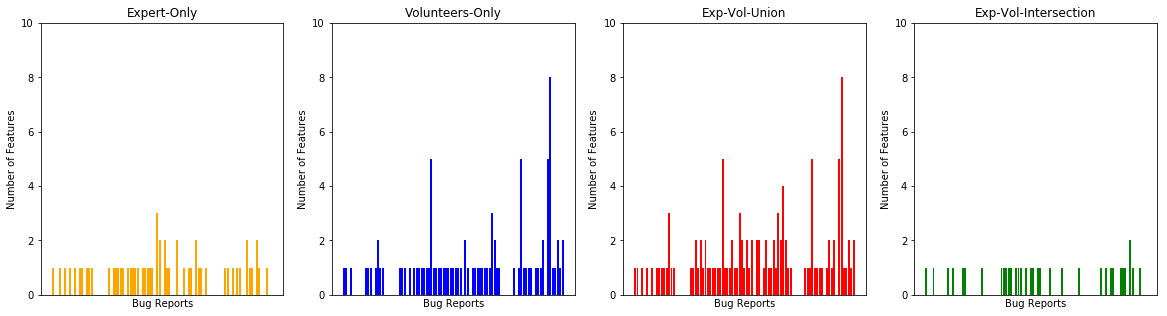

In [6]:
brs_expert = feat_br_expert_oracle.index
feats_amount_expert = feat_br_expert_oracle.apply(lambda row : sum(row.values), axis=1)

brs_vol = feat_br_volunteers_oracle.index
feats_amount_vol = feat_br_volunteers_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_union_oracle.index
feats_amount_exp_vol_union = feat_br_expert_volunteers_union_oracle.apply(lambda row : sum(row.values), axis=1)

brs_exp_vol = feat_br_expert_volunteers_intersec_oracle.index
feats_amount_exp_vol_intersec = feat_br_expert_volunteers_intersec_oracle.apply(lambda row : sum(row.values), axis=1)

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,5))

ax1.set_title('Expert-Only')
ax1.bar(x=np.arange(len(feat_br_expert_oracle)), height=feats_amount_expert, color='orange')
ax1.set(xlabel='Bug Reports', ylabel='Number of Features')
ax1.set_ylim([0, 10])
ax1.xaxis.set_ticks([])

ax2.set_title('Volunteers-Only')
ax2.bar(x=np.arange(len(feat_br_volunteers_oracle)), height=feats_amount_vol, color='blue')
ax2.set(xlabel='Bug Reports', ylabel='Number of Features')
ax2.set_ylim([0, 10])
ax2.xaxis.set_ticks([])

ax3.set_title('Exp-Vol-Union')
ax3.bar(x=np.arange(len(feat_br_expert_volunteers_union_oracle)), height=feats_amount_exp_vol_union, color='red')
ax3.set(xlabel='Bug Reports', ylabel='Number of Features')
ax3.set_ylim([0, 10])
ax3.xaxis.set_ticks([])

ax4.set_title('Exp-Vol-Intersection')
ax4.bar(x=np.arange(len(feat_br_expert_volunteers_intersec_oracle)), height=feats_amount_exp_vol_intersec, color='green')
ax4.set(xlabel='Bug Reports', ylabel='Number of Features')
ax4.set_ylim([0, 10])
ax4.xaxis.set_ticks([])

print("BRs x Feats Mean Amount - Exp Oracle: {:2.2}".format(np.mean(feats_amount_expert)))
print("BRs x Feats Mean Amount - Vol Oracle: {:2.2}".format(np.mean(feats_amount_vol)))
print("BRs x Feats Mean Amount - Exp-Vol Union Oracle: {:2.2}".format(np.mean(feats_amount_exp_vol_union)))
print("BRs x Feats Mean Amount - Exp-Vol Intersec Oracle: {:2.2}".format(np.mean(feats_amount_exp_vol_intersec)))

# BR x Feats Amount Boxplots

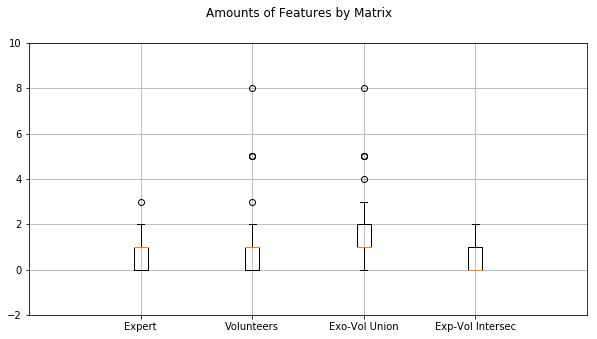

In [7]:
width = 0.25

pos = list([[2],[4],[6],[8]]) 
f,ax1 = plt.subplots(1,1, figsize=(10,5))
f.suptitle('Amounts of Features by Matrix')

boxplots = ['Expert', 'Volunteers', 'Exo-Vol Union', 'Exp-Vol Intersec']

ax1.boxplot(feats_amount_expert, positions=pos[0], widths=width)
ax1.boxplot(feats_amount_vol, positions=pos[1], widths=width)
ax1.boxplot(feats_amount_exp_vol_union, positions=pos[2], widths=width)
ax1.boxplot(feats_amount_exp_vol_intersec, positions=pos[3], widths=width)

ax1.set_xticks([a[0] for a in pos])
ax1.set_xticklabels(boxplots)
ax1.set_xlim([0,10])
ax1.set_ylim([-2,10])
ax1.grid()

# Analysis of Histograms of Features Amounts

(array([58.,  0.,  0.,  0.,  0., 32.,  0.,  0.,  0.,  1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

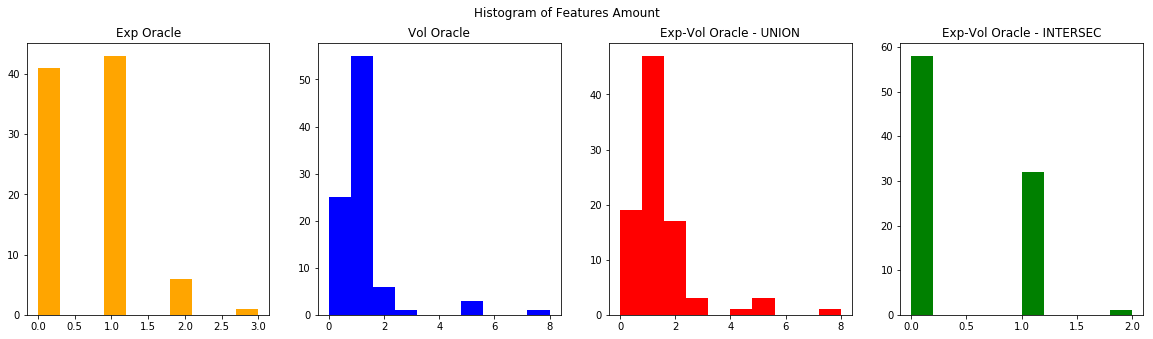

In [8]:
f2, (ax4,ax5,ax6,ax7) = plt.subplots(1, 4, figsize=(20,5))

f2.suptitle(t='Histogram of Features Amount')

ax4.set_title('Exp Oracle')
ax4.hist(feats_amount_expert, color='orange')

ax5.set_title('Vol Oracle')
ax5.hist(feats_amount_vol, color='blue')

ax6.set_title('Exp-Vol Oracle - UNION')
ax6.hist(feats_amount_exp_vol_union, color='red')

ax7.set_title('Exp-Vol Oracle - INTERSEC')
ax7.hist(feats_amount_exp_vol_intersec, color='green')

# Analysis of All Answers

In [13]:
features[features.Feature_Number == 15]

,Feature_Number,Feature_Shortname,Firefox_Version,Firefox_Feature,Feature_Description,Reference,feat_name,feat_desc
14,15,downloads_dropmaker,51 Branch,Downloads Dropmaker,The download dropmaker displays the amount of ...,https://mikeconley.ca/blog/2013/04/02/download...,downloads_dropmaker,15 downloads_dropmaker 51 Branch Downloads Dro...


In [11]:
br_2_feature_matrix_final[['Features_IDs_exp_m','Features_IDs_vol_m']]

,Features_IDs_exp_m,Features_IDs_vol_m
Bug_Number,,
1248267,6,6
1248268,,4
1257087,,
1264988,1,1
1267480,,
1267501,3,
1269348,,
1269485,3,
1270274,,


# Analysis of No Matching Answers

In [21]:
print(br_2_feature_matrix_final[(br_2_feature_matrix_final.Features_IDs_exp_m != br_2_feature_matrix_final.Features_IDs_vol_m) &
                                (br_2_feature_matrix_final.Features_IDs_exp_vol_intersec_m == "")].shape)

no_matching_answers = br_2_feature_matrix_final[(br_2_feature_matrix_final.Features_IDs_exp_m != br_2_feature_matrix_final.Features_IDs_vol_m) &
                                                (br_2_feature_matrix_final.Features_IDs_exp_vol_intersec_m.isin([" ", ""]))][['Features_IDs_exp_m','Features_IDs_vol_m']]

(39, 5)


In [22]:
no_matching_answers.head()

,Features_IDs_exp_m,Features_IDs_vol_m
Bug_Number,,
1248268,,4
1267501,3,
1269485,3,
1271607,,1
1277937,1,


In [23]:
no_matching_answers['f_names_exp'] = no_matching_answers.Features_IDs_exp_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
no_matching_answers['f_names_vol'] = no_matching_answers.Features_IDs_vol_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
no_matching_answers['bug_title'] = no_matching_answers.apply(lambda row : bugreports[bugreports.Bug_Number == int(row.name)].Summary.values[0], axis=1)
print(no_matching_answers.shape)
no_matching_answers

(39, 5)


,Features_IDs_exp_m,Features_IDs_vol_m,f_names_exp,f_names_vol,bug_title
Bug_Number,,,,,
1248268,,4,[],[[browser_customization]],"Unable to disable ""Recently bookmarked"""
1267501,3,,[[apz_async_scrolling]],[],New Private Browsing start-page overflows off ...
1269485,3,,[[apz_async_scrolling]],[],New Private Browsing start-page has white/gray...
1271607,,1,[],[[new_awesome_bar]],The new window's size is modified if the last ...
1277937,1,,[[new_awesome_bar]],[],https has an underline instead of a strikethro...
1278388,,1,[],[[new_awesome_bar]],Permafailing on the change to firefox50: brows...
1279140,1,4 7,[[new_awesome_bar]],"[[browser_customization], [w10_comp]]",awesomebar displaying incorrect text UI for co...
1287687,,3,[],[[apz_async_scrolling]],Syncs happen every 90 seconds when stale devic...
1287748,4,15,[[browser_customization]],[[downloads_dropmaker]],Syncing away from lwtheme updates internal sta...


# Analysis of Answers

In [24]:
br_2_feature_matrix_final['f_names_exp'] = br_2_feature_matrix_final.Features_IDs_exp_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
br_2_feature_matrix_final['f_names_vol'] = br_2_feature_matrix_final.Features_IDs_vol_m.apply(lambda row : [features[features.Feature_Number == int(f_id)].Feature_Shortname for f_id in row.split(" ") if f_id != ""])
br_2_feature_matrix_final['bug_title'] = br_2_feature_matrix_final.apply(lambda row : bugreports[bugreports.Bug_Number == int(row.name)].Summary.values[0], axis=1)
br_2_feature_matrix_final

,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,f_names_exp,f_names_vol
Bug_Number,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,[[context_menu]],[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,[],[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,[],[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,[[new_awesome_bar]],[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,[],[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,[[apz_async_scrolling]],[]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,[],[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,[[apz_async_scrolling]],[]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,[],[]
